**Table of contents**<a id='toc0_'></a>    
- [Importing Libraries](#toc1_)    
- [Configuring Visualization Parameters](#toc2_)    
- [Configuring Other Notebook Parameters](#toc3_)    
- [Pre-installing Custom Functions](#toc4_)    
- [Practicing in Stages](#toc5_)    
  - [DICOM in Python](#toc5_1_)    
    - [Extraction of DICOM File](#toc5_1_1_)    
    - [Visualization of DICOM File](#toc5_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importing Libraries](#toc0_)


In [1]:
# Import PyDicom before using PyDicom functions

# DICOM (Digital Imaging and Communications in Medicine) is the standard protocol for
# the management and transmission of medical images and related data, and is used by
# many healthcare facilities

# PyDicom is a pure Python package for working with DICOM files
import pydicom

In [2]:
# The `pathlib` module is similar to the `os.path` module, but `pathlib` provides a more
# advanced and convenient interface than `os.path`

# It is possible to use `pathlib` to represent file paths as specialized `Path` objects
# instead of plain strings
from pathlib import Path

In [3]:
import numpy as np

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import random
import reprlib
import sys

# <a id='toc2_'></a>[Configuring Visualization Parameters](#toc0_)


In [6]:
%matplotlib inline

In [7]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [8]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# <a id='toc3_'></a>[Configuring Other Notebook Parameters](#toc0_)


In [9]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# <a id='toc4_'></a>[Pre-installing Custom Functions](#toc0_)


In [10]:
sys.path.append("../")

In [11]:
from Modules import *

# <a id='toc5_'></a>[Practicing in Stages](#toc0_)

## <a id='toc5_1_'></a>[DICOM in Python](#toc0_)

### <a id='toc5_1_1_'></a>[Extraction of DICOM File](#toc0_)

In [12]:
# The dataset used in this practice project is a very small subset of CT images extracted from
# the Cancer Imaging Archive (TCIA), which contains middle slices of all CT images where
# valid age, modality, and contrast tags can be found

# The dataset is provided by the Kaggel dataset called CT Medical Imaging
# (https://www.kaggle.com/datasets/kmader/siim-medical-images) under the license type
# (http://creativecommons.org/licenses/ by/3.0/)

# The link to the TCIA archive of the full dataset is
# https://wiki.cancerimagingarchive.net/display/Public/TCGA-LUAD
dir_path = "../Datasets/Kaggle - CT Medical Images/dicom_dir/"
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
# The main function of PyDicom to read and parse DICOM files is `read_file`
dicom_file = pydicom.read_file(dir_path + sample_dcm)

tabulation = Form_Generator()
tabulation.heading_printer("Initial understanding of DICOM file")

statements = [
    """
dir_path = "../Datasets/Kaggle - CT Medical Images/dicom_dir/"
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(dir_path + sample_dcm)
"""
]
tabulation.statement_generator(statements)

variables = ["dicom_file"]
values = [str(reprlib_rules.repr(dicom_file))]
tabulation.variable_generator(variables, values)

expressions = [
    "dicom_file[0x0028, 0x0010]",
    "dicom_file[0x0028, 0x0011]",
    "dicom_file[0x0018, 0x0015]",
    "dicom_file.Rows",
    "dicom_file.Columns",
    "dicom_file.BodyPartExamined",
    "dicom_file.keys()",
    "dicom_file.values()",
    "dicom_file.dir()",
    'dicom_file.dir("Image")',
]
results = [
    str(dicom_file[0x0028, 0x0010]),
    str(dicom_file[0x0028, 0x0011]),
    str(dicom_file[0x0018, 0x0015]),
    str(dicom_file.Rows),
    str(dicom_file.Columns),
    str(dicom_file.BodyPartExamined),
    str(reprlib_rules.repr(dicom_file.keys())),
    str(reprlib_rules.repr(dicom_file.values())),
    str(reprlib_rules.repr(dicom_file.dir())),
    str(reprlib_rules.repr(dicom_file.dir("Image"))),
]
tabulation.expression_generator(expressions, results, 1)

Initial understanding of DICOM file

    +-------------------------------------------------------+
    | Statement                                             |
    +-------------------------------------------------------+
    | dir_path = "../Datasets/Kaggle - CT Medical           |
    |     Images/dicom_dir/"                                |
    | sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"     |
    | dicom_file = pydicom.read_file(dir_path + sample_dcm) |
    +-------------------------------------------------------+
    +------------+------------------------------------------------+
    | Variable   | Value                                          |
    +------------+------------------------------------------------+
    | dicom_file | Dataset.file_meta                              |
    |            |         -------------------------------        |
    |            | (0002, 0000) File Meta Information Group       |
    |            |         Length  UL: 194                 

In [13]:
# DICOM data has an attribute called `pixel_array` that provides more useful pixel data
# for uncompressed images that can be passed to the graphics library for viewing

# To use this attribute, the system must have the NumPy numeric package installed,
# since `pixel_array` returns a NumPy array
ct = dicom_file.pixel_array

tabulation = Form_Generator()
tabulation.heading_printer("Getting pixel data from DICOM file")

statements = ["ct = dicom_file.pixel_array"]
tabulation.statement_generator(statements)

variables = ["ct"]
values = [str(reprlib_rules.repr(ct))]
tabulation.variable_generator(variables, values)

expressions = ["ct.shape"]
results = [str(ct.shape)]
tabulation.expression_generator(expressions, results)

Getting pixel data from DICOM file

    +-----------------------------+
    | Statement                   |
    +-----------------------------+
    | ct = dicom_file.pixel_array |
    +-----------------------------+
    +----------+------------------------------------------------+
    | Variable | Value                                          |
    +----------+------------------------------------------------+
    | ct       | array([[0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        ...,                                    |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0],                |
    |          |        [0, 0, 0, ..., 0, 0, 0]], dtype=uint16) |
    +----------+------------------------------------------------+
    +------------+------------+
    | Expression | Result 

### <a id='toc5_1_2_'></a>[Visualization of DICOM File](#toc0_)

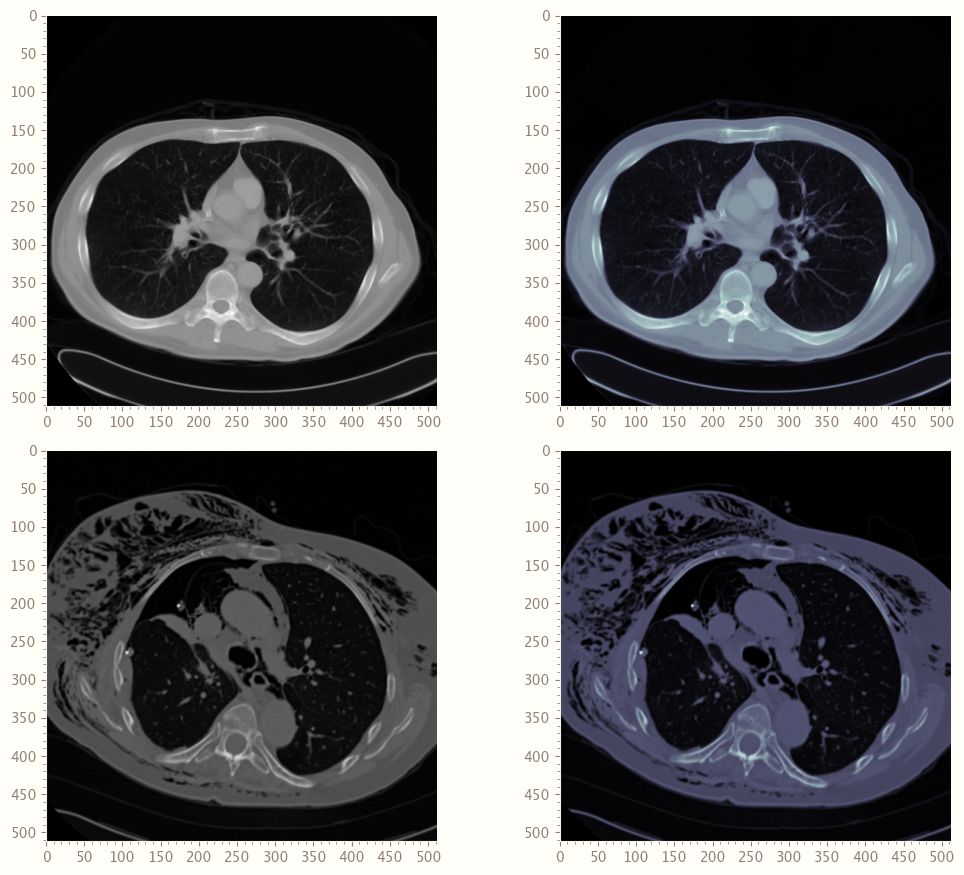

In [39]:
def image_display(image, ax, title, cmap):
    ax.imshow(image, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    x_ticks = list(range(0, image.shape[1], 50))
    y_ticks = list(range(0, image.shape[0], 50))
    ax.set(xticks=x_ticks, xticklabels=x_ticks, yticks=y_ticks, yticklabels=y_ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    ax.minorticks_on()
    return ax


path_object = Path(dir_path)
random_dicom_path = random.choice(
    [
        entry.name
        # When a path points to a directory, `Path.iterdir` generates a path object 
        # of the directory's contents
        for entry in path_object.iterdir()
        # `Path.is_file` returns True if the path points to a normal file or to a symbolic link 
        # to a normal file, False if it points to another type of file
        
        #
        if (entry.is_file() and entry.name != sample_dcm)
    ]
)
random_dicom_file = pydicom.read_file(dir_path + random_dicom_path)

plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1])

fig, axs = plt.subplots(nrows=2, ncols=2)

image_display(
    ct,
    axs[0, 0],
    "",
    #
    cmap="gray",
)

image_display(
    ct,
    axs[0, 1],
    "",
    #
    cmap="bone",
)

image_display(
    random_dicom_file.pixel_array,
    axs[1, 0],
    "",
    cmap="gray",
)

image_display(
    random_dicom_file.pixel_array,
    axs[1, 1],
    "",
    cmap="bone",
)


fig.suptitle(
    "",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

In [15]:
def get_image_plane(dicom_file):
    IOP_round = [round(x) for x in dicom_file.ImageOrientationPatient]
    plane = np.cross(IOP_round[:3], IOP_round[3:6])
    plane = [abs(x) for x in plane]
    if plane[0] == 1:
        return "Sagittal"
    elif plane[1] == 1:
        return "Coronal"
    elif plane[2] == 1:
        return "Axial"
    else:
        "Unknown"

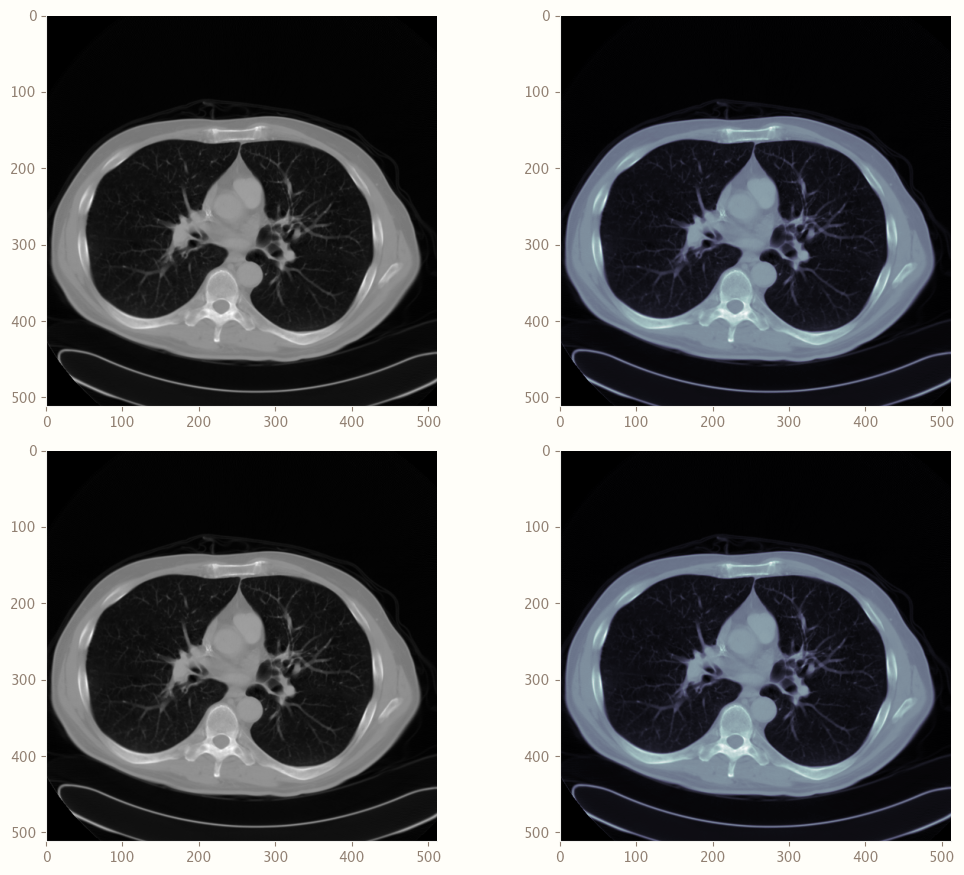

In [16]:


def image_display(image, ax, title, cmap):
    # Data can be displayed as an image using `imshow`, but only on a 2D regular raster,
    # so it needs to be reshaped into a 2D array
    ax.imshow(image, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    # ticks = list(range(0, 28, 10))
    # ax.set(xticks=ticks, xticklabels=ticks, yticks=ticks, yticklabels=ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    # ax.minorticks_on()
    return ax





def anatomical_orientation_markers(dicom_file, ax, cmap):
    cmap_color = mpl.colormaps[cmap]
    rgba_color = cmap_color(0.9)
    return rgba_color



def DICOM_image_display(dicom_file, ax, title, cmap):
    # Data can be displayed as an image using `imshow`, but only on a 2D regular raster,
    # so it needs to be reshaped into a 2D array
    ax.imshow(dicom_file.pixel_array, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    # ticks = list(range(0, 28, 10))
    # ax.set(xticks=ticks, xticklabels=ticks, yticks=ticks, yticklabels=ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    # ax.minorticks_on()
    return ax


plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1])

# random_selector = np.random.choice(range(len(train_data)), 4)

fig, axs = plt.subplots(nrows=2, ncols=2)

image_display(
    ct,
    axs[0, 0],
    "",
    cmap="gray",
)

image_display(
    ct,
    axs[0, 1],
    "",
    cmap="bone",
)

DICOM_image_display(
    dicom_file,
    axs[1, 0],
    "",
    cmap="gray",
)

DICOM_image_display(
    dicom_file,
    axs[1, 1],
    "",
    cmap="bone",
)


fig.suptitle(
    "",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

In [17]:
dicom_file.keys()
dicom_file.values()

dict_values([(0008, 0000) Group Length                        UL: 430, (0008, 0005) Specific Character Set              CS: 'ISO_IR 100', (0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL'], (0008, 0016) SOP Class UID                       UI: CT Image Storage, (0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169, (0008, 0020) Study Date                          DA: '19830708', (0008, 0021) Series Date                         DA: '19830708', (0008, 0022) Acquisition Date                    DA: '19830708', (0008, 0023) Content Date                        DA: '19830708', (0008, 0030) Study Time                          TM: '085723.000000', (0008, 0031) Series Time                         TM: '090344.332000', (0008, 0032) Acquisition Time                    TM: '090517.558000', (0008, 0033) Content Time                        TM: '090501.593000', (0008, 0040) Data Set Type                   

In [18]:
res = []

# construct path object
d = Path(dir_path)

# iterate directory
for entry in d.iterdir():
    # check if it a file
    if entry.is_file():
        print(entry.name)

ID_0062_AGE_0067_CONTRAST_0_CT.dcm
ID_0072_AGE_0060_CONTRAST_0_CT.dcm
ID_0041_AGE_0045_CONTRAST_1_CT.dcm
ID_0075_AGE_0080_CONTRAST_0_CT.dcm
ID_0052_AGE_0072_CONTRAST_0_CT.dcm
ID_0028_AGE_0074_CONTRAST_1_CT.dcm
ID_0070_AGE_0074_CONTRAST_0_CT.dcm
ID_0098_AGE_0061_CONTRAST_0_CT.dcm
ID_0009_AGE_0048_CONTRAST_1_CT.dcm
ID_0065_AGE_0082_CONTRAST_0_CT.dcm
ID_0005_AGE_0048_CONTRAST_1_CT.dcm
ID_0080_AGE_0070_CONTRAST_0_CT.dcm
ID_0013_AGE_0060_CONTRAST_1_CT.dcm
ID_0086_AGE_0073_CONTRAST_0_CT.dcm
ID_0061_AGE_0074_CONTRAST_0_CT.dcm
ID_0083_AGE_0082_CONTRAST_0_CT.dcm
ID_0078_AGE_0066_CONTRAST_0_CT.dcm
ID_0077_AGE_0074_CONTRAST_0_CT.dcm
ID_0035_AGE_0059_CONTRAST_1_CT.dcm
ID_0087_AGE_0044_CONTRAST_0_CT.dcm
ID_0088_AGE_0067_CONTRAST_0_CT.dcm
ID_0084_AGE_0067_CONTRAST_0_CT.dcm
ID_0020_AGE_0066_CONTRAST_1_CT.dcm
ID_0039_AGE_0074_CONTRAST_1_CT.dcm
ID_0004_AGE_0056_CONTRAST_1_CT.dcm
ID_0059_AGE_0074_CONTRAST_0_CT.dcm
ID_0076_AGE_0068_CONTRAST_0_CT.dcm
ID_0006_AGE_0075_CONTRAST_1_CT.dcm
ID_0027_AGE_0064_CON

In [19]:
path = Path(dir_path)

dicom_path = random.choice([entry for entry in path.iterdir() if (entry.is_file() and entry.name != sample_dcm)])

dicom_path.name

'ID_0049_AGE_0061_CONTRAST_1_CT.dcm'

In [20]:
for entry in d.iterdir():
    sample_dcm = entry.name
    dicom_file = pydicom.read_file(dir_path + sample_dcm)
    if len(dicom_file.ImageType) >= 3 and dicom_file.ImageType[2] == "AXIAL":
        if dicom_file.RotationDirection == "CW":
            if dicom_file.Rows != 512 or dicom_file.Columns != 512:
                print(dicom_file.Rows)
                print(dicom_file.Columns)


In [21]:
dicom_file.dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdmittingDiagnosesDescription',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'BurnedInAnnotation',
 'Columns',
 'CompressionCode',
 'ContentDate',
 'ContentTime',
 'ContrastBolusAgent',
 'ConvolutionKernel',
 'DataSetSubtype',
 'DataSetType',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'Exposure',
 'ExposureTime',
 'FilterType',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageDimensions',
 'ImageFormat',
 'ImageGeometryType',
 'ImageLocation',
 'ImageOrientation',
 'ImageOrientationPatient',
 'ImagePosition',
 'ImagePositionPatient',
 'ImageType',
 'InstanceNumber',
 'KVP',
 'Location',
 'LongitudinalTemporalInformationModified',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientComments',
 'PatientID',
 'PatientI

In [22]:
cmap = mpl.colormaps["bone"]
rgba = cmap(0.9)
rgba

(0.8659619615501968, 0.9142156862745098, 0.9142156669730502, 1.0)

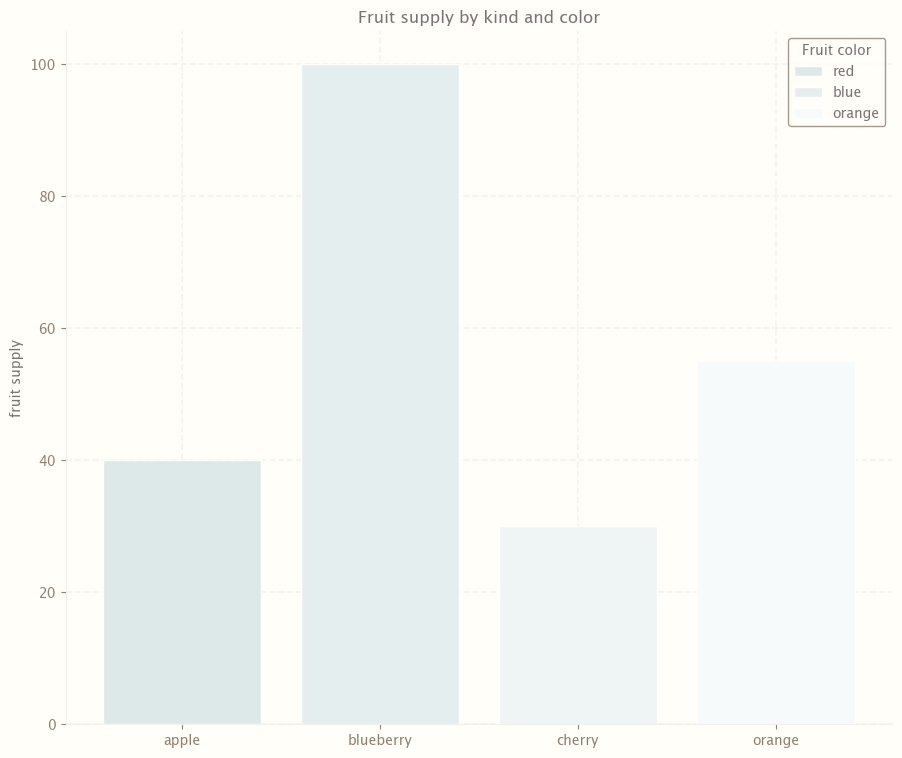

In [23]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = [cmap(0.9), cmap(0.925), cmap(0.95), cmap(0.975)]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

In [24]:
dicom_file.ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

In [25]:
dicom_file.ImagePositionPatient

[-150, -307, -239]

In [26]:
dicom_file.SliceLocation

'-239.0'

In [27]:
round(0.5)

0

In [28]:
abs(1)

1

In [29]:
def file_plane(IOP):
    IOP_round = [round(float(x)) for x in IOP]
    plane = np.cross(IOP_round[0:3], IOP_round[3:6])
    plane = [abs(x) for x in plane]
    return plane
    """
    if plane[0] == 1:
        return "Sagittal"
    elif plane[1] == 1:
        return "Coronal"
    elif plane[2] == 1:
        return "Transverse"
    """
    
#IOP=['1', '0', '0', '0', '0', '-1']
IOP=['0', '1', '0', '0', '0', '-1']
#IOP=['1', '0', '0', '0', '1', '0']
#IOP=[0.5,0,-0.8660254,0,1,0]
#IOP=[1, 0, 0, 0, -1, 0]

file_plane(IOP)

[1, 0, 0]